## Text Preprocessing

In [1]:
import nltk

### Tokenization

In [10]:
sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''

In [9]:
# Word tokenization
from nltk import word_tokenize

def word_tokenization(text):
    words = word_tokenize(text)
    return words

word_tokenize(sentence)

['In',
 'the',
 'Period',
 'of',
 'Kings',
 ',',
 'Rome',
 'was',
 'led',
 'by',
 'six',
 'kings',
 'from',
 'its',
 'founding',
 'until',
 '510',
 'BC',
 '.',
 'This',
 'period',
 'saw',
 'significant',
 'advancements',
 'in',
 'military',
 'strength',
 'and',
 'economic',
 'growth',
 ',',
 'including',
 'the',
 'increase',
 'in',
 'the',
 'production',
 'and',
 'trade',
 'of',
 'goods',
 'like',
 'oil',
 'lamps',
 '.',
 'The',
 'end',
 'of',
 'this',
 'period',
 'marked',
 'the',
 'decline',
 'of',
 'Etruscan',
 'power',
 ',',
 'leading',
 'to',
 'Rome',
 "'s",
 'entry',
 'into',
 'its',
 'Republican',
 'Period',
 '.']

In [11]:
# Sentence Tokenize
from nltk import sent_tokenize

def sentence_tokenization(text):
    sentences = sent_tokenize(text)
    return sentences

sent_tokenize(sentence)

['In the Period of Kings, Rome was led by six kings from its founding until 510 BC.',
 'This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps.',
 "The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period."]

### Removing Punctuations

In [12]:
sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''

In [13]:
import string

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuations(text):
    return text.translate(str.maketrans('','', PUNCT_TO_REMOVE))

remove_punctuations(sentence)

'In the Period of Kings Rome was led by six kings from its founding until 510 BC This period saw significant advancements in military strength and economic growth including the increase in the production and trade of goods like oil lamps The end of this period marked the decline of Etruscan power leading to Romes entry into its Republican Period'

### Character to ASCII 

In [14]:
def char_to_ascii(char):
    return ord(char)

char_to_ascii('A')

65

### ASCII to Character

In [15]:
def ascii_to_character(ascii_code):
    return chr(ascii_code)

ascii_to_character(65)

'A'

### Lower Casing

In [24]:
def lower_case(text):
    return text.lower()

sentence = 'I was Roman King in the past century.'
lower_case(sentence)

'i was roman king in the past century.'

### Removal of Stopwords

In [25]:
from nltk.corpus import stopwords

STOP_WORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    text = lower_case(text)
    words = word_tokenization(text)
    for stop_word in STOP_WORDS:
        if stop_word in words:
            words.remove(stop_word)
    return words

sentence = 'I was Roman King in the past century.'
remove_stopwords(sentence)

['roman', 'king', 'past', 'century', '.']

### Removal of Frequent Words

In [35]:
from collections import Counter

# Find the most n frequent words in a corpus
def find_n_freq_words(text, n):
    text = lower_case(text)
    words = word_tokenization(text)
    cnt = Counter(words)
    common_k_words = [w[0] for w in cnt.most_common(n)]
    return common_k_words


# Removing the top n frequent words
def remove_freq_words(text, n):
    FREQ_WORDS = find_n_freq_words(text, n)
    words = word_tokenization(text)
    return ' '.join([word for word in words if word not in FREQ_WORDS])


sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
remove_freq_words(sentence, 2)

"In Period of Kings , Rome was led by six kings from its founding until 510 BC . This saw significant advancements in military strength and economic growth , including increase in production and trade of goods like oil lamps . The end of this marked decline of Etruscan power , leading to Rome 's entry into its Republican Period ."

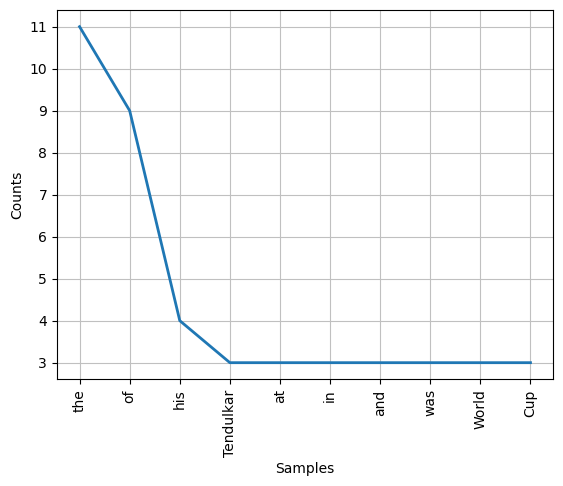

<Axes: xlabel='Samples', ylabel='Counts'>

In [85]:
from nltk import FreqDist

sentence = '''
Tendulkar took up cricket at the age of eleven made his Test match debut on 15 November 1989 against Pakistan in Karachi at the age of sixteen and went on to represent Mumbai domestically and India internationally for over 24 years9 In 2002 halfway through his career Wisden ranked him the secondgreatest Test batsman of all time behind Don Bradman and the secondgreatest ODI batsman of all time behind Viv Richards10 The same year Tendulkar was a part of the team that was one of the jointwinners of the 2002 ICC Champions Trophy Later in his career Tendulkar was part of the Indian team that won the 2011 Cricket World Cup his first win in six World Cup appearances for India11 He had previously been named Player of the Tournament at the 2003 World Cup
'''

freq = FreqDist(word_tokenization(sentence))
freq.plot(10, cumulative=False)

### Removal of Rare Words

In [62]:
from collections import Counter

# Find the n rare words in a corpus
def find_n_rare_words(text, n):
    text = lower_case(text)
    words = word_tokenization(text)
    cnt = Counter(words)
    return [w[0] for w in cnt.most_common()[-n:]]


# Remove the n rare words from a corpus
def remove_rare_words(text, n):
    text = lower_case(text)
    RARE_WORDS = find_n_rare_words(text, n)
    words = word_tokenization(text)
    return ' '.join([word for word in words if word not in RARE_WORDS])

sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
remove_rare_words(sentence, 5)

'in the period of kings , rome was led by six kings from its founding until 510 bc . this period saw significant advancements in military strength and economic growth , including the increase in the production and trade of goods like oil lamps . the end of this period marked the decline of etruscan power , leading rome its period .'

### Morphemes of a word

In [64]:
from polyglot.text import Text,Word

def find_morpheme(word):
    w = Word(word, language='en')
    return (w, w.morphemes)

find_morpheme('computing')

('computing', WordList(['com', 'put', 'ing']))

### POS Tagging

In [68]:
from nltk import pos_tag

def pos_tagging(text):
    words = word_tokenization(text)
    return pos_tag(words)

sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
pos_tagging(sentence)[:5]

[('In', 'IN'),
 ('the', 'DT'),
 ('Period', 'NNP'),
 ('of', 'IN'),
 ('Kings', 'NNP')]

In [67]:
# Using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def pos_tagging_spacy(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
pos_tagging_spacy(sentence)[:5]

[('In', 'ADP'),
 ('the', 'DET'),
 ('Period', 'PROPN'),
 ('of', 'ADP'),
 ('Kings', 'NOUN')]

**Further questions in POS tagging**

1. Extracting all the verbs, nouns, adverbs, and adjectives.
2. Extracting all the verbs, nouns, adverbs, and adjectives in their root form(stemming).

### Stemming

In [69]:
from nltk.stem.porter import PorterStemmer

def stem_words(text):
    stemmer  =PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
stem_words(sentence)

"in the period of kings, rome wa led by six king from it found until 510 bc. thi period saw signific advanc in militari strength and econom growth, includ the increas in the product and trade of good like oil lamps. the end of thi period mark the declin of etruscan power, lead to rome' entri into it republican period."

### Lemmatization

In [75]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text_nltk(text):
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenization(text)
  lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
  return lemmas


sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
print(lemmatize_text_nltk(sentence))

['In', 'the', 'Period', 'of', 'Kings', ',', 'Rome', 'wa', 'led', 'by', 'six', 'king', 'from', 'it', 'founding', 'until', '510', 'BC', '.', 'This', 'period', 'saw', 'significant', 'advancement', 'in', 'military', 'strength', 'and', 'economic', 'growth', ',', 'including', 'the', 'increase', 'in', 'the', 'production', 'and', 'trade', 'of', 'good', 'like', 'oil', 'lamp', '.', 'The', 'end', 'of', 'this', 'period', 'marked', 'the', 'decline', 'of', 'Etruscan', 'power', ',', 'leading', 'to', 'Rome', "'s", 'entry', 'into', 'it', 'Republican', 'Period', '.']


In [76]:
import spacy

def lemmatize_text_spacy(text):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(text)
  lemmas = [token.lemma_ for token in doc]
  return lemmas

sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
print(lemmatize_text_spacy(sentence))


['in', 'the', 'Period', 'of', 'king', ',', 'Rome', 'be', 'lead', 'by', 'six', 'king', 'from', 'its', 'founding', 'until', '510', 'BC', '.', 'this', 'period', 'see', 'significant', 'advancement', 'in', 'military', 'strength', 'and', 'economic', 'growth', ',', 'include', 'the', 'increase', 'in', 'the', 'production', 'and', 'trade', 'of', 'good', 'like', 'oil', 'lamp', '.', 'the', 'end', 'of', 'this', 'period', 'mark', 'the', 'decline', 'of', 'etruscan', 'power', ',', 'lead', 'to', 'Rome', "'s", 'entry', 'into', 'its', 'Republican', 'Period', '.']


### Remove URLs

In [78]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

text = "Want to know more. Checkout www.h2o.ai for additional information"
remove_urls(text)

'Want to know more. Checkout  for additional information'

### Remove HTML tags

In [80]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

text = """<div><h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

print(remove_html(text))

 H2O
 AutoML
 Driverless AI



### Chunking

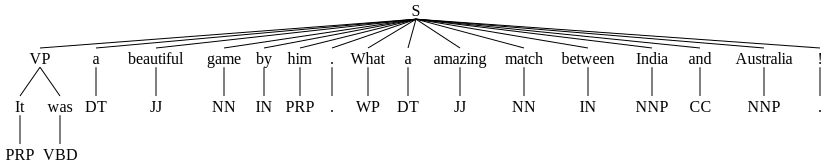

In [86]:
from nltk import RegexpParser

def chunking(text, grammar):
    chunk_parser = RegexpParser(grammar)
    tags = pos_tagging(text)
    tree = chunk_parser.parse(tags)
    return tree

sentence = "It was a beautiful game by him. What a amazing match between India and Australia!"
grammar = "VP: {<PRP><VBD>}"
chunking(sentence, grammar)

In [95]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

sentence = "It was a beautiful game by him. What a amazing match between India and Australia!"
doc = nlp(sentence)
displacy.render(doc)

### Wordnet for Semantics

- To find the synonyms and antonyms

In [88]:
from nltk.corpus import wordnet

def find_synonyms(word):
    synonyms = set()
    for word in wordnet.synsets(word):
        synonyms.add(word.lemmas()[0].name())
    return synonyms

find_synonyms('organization')

{'administration', 'arrangement', 'constitution', 'organization'}

In [90]:
def find_antonyms(word):
    antonyms = set()
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas(): 
            if lemma.antonyms():             # When antonyms are available, add it.
                antonyms.add(lemma.antonyms()[0].name())
    return antonyms
    

find_antonyms('run')

{'idle', 'malfunction'}

### Named Entity Recognition

In [91]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

sentence = '''In the Period of Kings, Rome was led by six kings from its founding until 510 BC. This period saw significant advancements in military strength and economic growth, including the increase in the production and trade of goods like oil lamps. The end of this period marked the decline of Etruscan power, leading to Rome's entry into its Republican Period.'''
doc = nlp(sentence)
displacy.render(doc, style='ent', jupyter=True)

### Word Sense Disambiguation

In [94]:
from nltk.wsd import lesk

def word_sense_disambiguation(text, word):
    words = word_tokenization(text)
    meaning = lesk(words, word).definition()
    return meaning

word_sense_disambiguation('I am stuck in a traffic jam', 'jam')

'get stuck and immobilized'

### Abstractive Text Summarization

#### TextRank Algorithm

In [105]:
# Import the TextRank summarizer
from sumy.summarizers.text_rank import TextRankSummarizer

# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

def text_rank_summarizer(text, sentence_count):
    # Initializing the parser
    my_parser = PlaintextParser.from_string(text, Tokenizer('english'))
    text_rank_summarizer = TextRankSummarizer()
    summary = text_rank_summarizer(my_parser.document, sentences_count=sentence_count)
    return ' '.join([str(sentence) for sentence in summary])


text = '''The Bengal tiger is a population of the Panthera tigris tigris subspecies and the nominate tiger subspecies.[1] It ranks among the biggest wild cats alive today.[2][3] It is considered to belong to the world's charismatic megafauna.[4]
The tiger is estimated to have been present in the Indian subcontinent since the Late Pleistocene, for about 12,000 to 16,500 years.[5][6][7] Today, it is threatened by poaching, loss and fragmentation of habitat, and was estimated at comprising fewer than 2,500 wild individuals by 2011. None of the Tiger Conservation Landscapes within its range is considered large enough to support an effective population of more than 250 adult individuals.[8]
The Bengal tiger's historical range covered the Indus River valley until the early 19th century, almost all of India, Pakistan, southern Nepal, Bangladesh, Bhutan, and southwestern China. Today, it inhabits India, Bangladesh, Nepal, Bhutan, and southwestern China.[6] India's tiger population was estimated at 2,603–3,346 individuals by 2018.[9] Around 300–500 individuals are estimated in Bangladesh,[8] 355 in Nepal by 2022,[10] and 90 individuals in Bhutan by 2015.[11] Taxonomy
Felis tigris was the scientific name used by Carl Linnaeus in 1758 for the tiger.[12] It was subordinated to the genus Panthera by Reginald Innes Pocock in 1929. Bengal is the traditional type locality of the species and the nominate subspecies Panthera tigris tigris.[13]
The validity of several tiger subspecies in continental Asia was questioned in 1999. Morphologically, tigers from different regions vary little, and gene flow between populations in those regions is considered to have been possible during the Pleistocene. Therefore, it was proposed to recognise only two subspecies as valid, namely P. t. tigris in mainland Asia, and P. t. sondaica in the Greater Sunda Islands and possibly in Sundaland.[14] The nominate subspecies P. t. tigris constitutes two clades: the northern clade comprises the Siberian and Caspian tiger populations, and the southern clade all remaining continental tiger populations.[15] The extinct and living tiger populations in continental Asia have been subsumed to P. t. tigris since the revision of felid taxonomy in 2017.[1]
Results of a genetic analysis of 32 tiger samples indicate that the Bengal tiger samples grouped into a different clade than the Siberian tiger samples.
'''

text_rank_summarizer(text, sentence_count=3)

'The Bengal tiger is a population of the Panthera tigris tigris subspecies and the nominate tiger subspecies. [14] The nominate subspecies P. t. tigris constitutes two clades: the northern clade comprises the Siberian and Caspian tiger populations, and the southern clade all remaining continental tiger populations. [15] The extinct and living tiger populations in continental Asia have been subsumed to P. t. tigris since the revision of felid taxonomy in 2017.'

#### LexRank Algorithm

In [107]:
# Import the TextRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

def lex_rank_summarizer(text, sentence_count):
    # Initializing the parser
    my_parser = PlaintextParser.from_string(text, Tokenizer('english'))
    lex_rank_summarizer = LexRankSummarizer()
    summary = lex_rank_summarizer(my_parser.document, sentences_count=sentence_count)
    return ' '.join([str(sentence) for sentence in summary])


text = '''The Bengal tiger is a population of the Panthera tigris tigris subspecies and the nominate tiger subspecies.[1] It ranks among the biggest wild cats alive today.[2][3] It is considered to belong to the world's charismatic megafauna.[4]
The tiger is estimated to have been present in the Indian subcontinent since the Late Pleistocene, for about 12,000 to 16,500 years.[5][6][7] Today, it is threatened by poaching, loss and fragmentation of habitat, and was estimated at comprising fewer than 2,500 wild individuals by 2011. None of the Tiger Conservation Landscapes within its range is considered large enough to support an effective population of more than 250 adult individuals.[8]
The Bengal tiger's historical range covered the Indus River valley until the early 19th century, almost all of India, Pakistan, southern Nepal, Bangladesh, Bhutan, and southwestern China. Today, it inhabits India, Bangladesh, Nepal, Bhutan, and southwestern China.[6] India's tiger population was estimated at 2,603–3,346 individuals by 2018.[9] Around 300–500 individuals are estimated in Bangladesh,[8] 355 in Nepal by 2022,[10] and 90 individuals in Bhutan by 2015.[11] Taxonomy
Felis tigris was the scientific name used by Carl Linnaeus in 1758 for the tiger.[12] It was subordinated to the genus Panthera by Reginald Innes Pocock in 1929. Bengal is the traditional type locality of the species and the nominate subspecies Panthera tigris tigris.[13]
The validity of several tiger subspecies in continental Asia was questioned in 1999. Morphologically, tigers from different regions vary little, and gene flow between populations in those regions is considered to have been possible during the Pleistocene. Therefore, it was proposed to recognise only two subspecies as valid, namely P. t. tigris in mainland Asia, and P. t. sondaica in the Greater Sunda Islands and possibly in Sundaland.[14] The nominate subspecies P. t. tigris constitutes two clades: the northern clade comprises the Siberian and Caspian tiger populations, and the southern clade all remaining continental tiger populations.[15] The extinct and living tiger populations in continental Asia have been subsumed to P. t. tigris since the revision of felid taxonomy in 2017.[1]
Results of a genetic analysis of 32 tiger samples indicate that the Bengal tiger samples grouped into a different clade than the Siberian tiger samples.
'''

lex_rank_summarizer(text, sentence_count=3)

'The Bengal tiger is a population of the Panthera tigris tigris subspecies and the nominate tiger subspecies. [9] Around 300–500 individuals are estimated in Bangladesh,[8] 355 in Nepal by 2022,[10] and 90 individuals in Bhutan by 2015. [15] The extinct and living tiger populations in continental Asia have been subsumed to P. t. tigris since the revision of felid taxonomy in 2017.'

#### Latent Semantic Algorithm

In [108]:
# Import the LSA summarizer
from sumy.summarizers.lsa import LsaSummarizer

# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

def lsa_summarizer(text, sentence_count):
    # Initializing the parser
    my_parser = PlaintextParser.from_string(text, Tokenizer('english'))
    lsa_rank_summarizer = LsaSummarizer()
    summary = lsa_rank_summarizer(my_parser.document, sentences_count=sentence_count)
    return ' '.join([str(sentence) for sentence in summary])


text = '''The Bengal tiger is a population of the Panthera tigris tigris subspecies and the nominate tiger subspecies.[1] It ranks among the biggest wild cats alive today.[2][3] It is considered to belong to the world's charismatic megafauna.[4]
The tiger is estimated to have been present in the Indian subcontinent since the Late Pleistocene, for about 12,000 to 16,500 years.[5][6][7] Today, it is threatened by poaching, loss and fragmentation of habitat, and was estimated at comprising fewer than 2,500 wild individuals by 2011. None of the Tiger Conservation Landscapes within its range is considered large enough to support an effective population of more than 250 adult individuals.[8]
The Bengal tiger's historical range covered the Indus River valley until the early 19th century, almost all of India, Pakistan, southern Nepal, Bangladesh, Bhutan, and southwestern China. Today, it inhabits India, Bangladesh, Nepal, Bhutan, and southwestern China.[6] India's tiger population was estimated at 2,603–3,346 individuals by 2018.[9] Around 300–500 individuals are estimated in Bangladesh,[8] 355 in Nepal by 2022,[10] and 90 individuals in Bhutan by 2015.[11] Taxonomy
Felis tigris was the scientific name used by Carl Linnaeus in 1758 for the tiger.[12] It was subordinated to the genus Panthera by Reginald Innes Pocock in 1929. Bengal is the traditional type locality of the species and the nominate subspecies Panthera tigris tigris.[13]
The validity of several tiger subspecies in continental Asia was questioned in 1999. Morphologically, tigers from different regions vary little, and gene flow between populations in those regions is considered to have been possible during the Pleistocene. Therefore, it was proposed to recognise only two subspecies as valid, namely P. t. tigris in mainland Asia, and P. t. sondaica in the Greater Sunda Islands and possibly in Sundaland.[14] The nominate subspecies P. t. tigris constitutes two clades: the northern clade comprises the Siberian and Caspian tiger populations, and the southern clade all remaining continental tiger populations.[15] The extinct and living tiger populations in continental Asia have been subsumed to P. t. tigris since the revision of felid taxonomy in 2017.[1]
Results of a genetic analysis of 32 tiger samples indicate that the Bengal tiger samples grouped into a different clade than the Siberian tiger samples.
'''

lsa_summarizer(text, sentence_count=3)

'Today, it inhabits India, Bangladesh, Nepal, Bhutan, and southwestern China. [12] It was subordinated to the genus Panthera by Reginald Innes Pocock in 1929. Morphologically, tigers from different regions vary little, and gene flow between populations in those regions is considered to have been possible during the Pleistocene.'